In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

#from some_module import AR2_process


%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# Create an ar(2) process

#X_t = 0.33 * X_t-1 + 0.5 * X_t-2

#X_t - 0.33 * X_t-1 - 0.5 * X_t-2 = 0

#create array of 3 numbers
ar2_ex_ar_coefficients = np.array([1, -0.33, -0.5]) 
#create array of 3 numbers
ar2_ex_ma_coefficients = np.array([1, 0, 0])
#(ARMA) process is a statistical model used to analyze and forecast time series data
#Theoretical properties of an ARMA process for specified lag-polynomials
#ar: Coefficient for autoregressive lag polynomial, including zero lag
#ma: Coefficient for moving-average lag polynomial, including zero lag
AR2_process = ArmaProcess(ar2_ex_ar_coefficients,ar2_ex_ma_coefficients).generate_sample(nsample = 1000)

In [3]:
#Helper function to plot TS along with its PACF and ACF
def plot_ts_pacf_acf(ts, title="TITLE GOES HERE", xlabel = "Time"): 
    #Variables that are created outside of a function
    global fig, axs 
    #create 3 rows, 1 col of subplots
    fig, axs = plt.subplots(3, 1, figsize=(15,12))
    #put graphs closer together
    fig.tight_layout(pad = 3.0)
    #label x-axis
    axs[0].set_xlabel(xlabel)
    #label title
    axs[0].set_title(title)
    #graph "ts"
    axs[0].plot(ts)
    #Plots lags on the horizontal and the correlations on vertical axis.
    plot_acf(ts, lags=20, ax=axs[1]);
    #Plot the partial autocorrelation function
    plot_pacf(ts, lags=20, ax=axs[2])

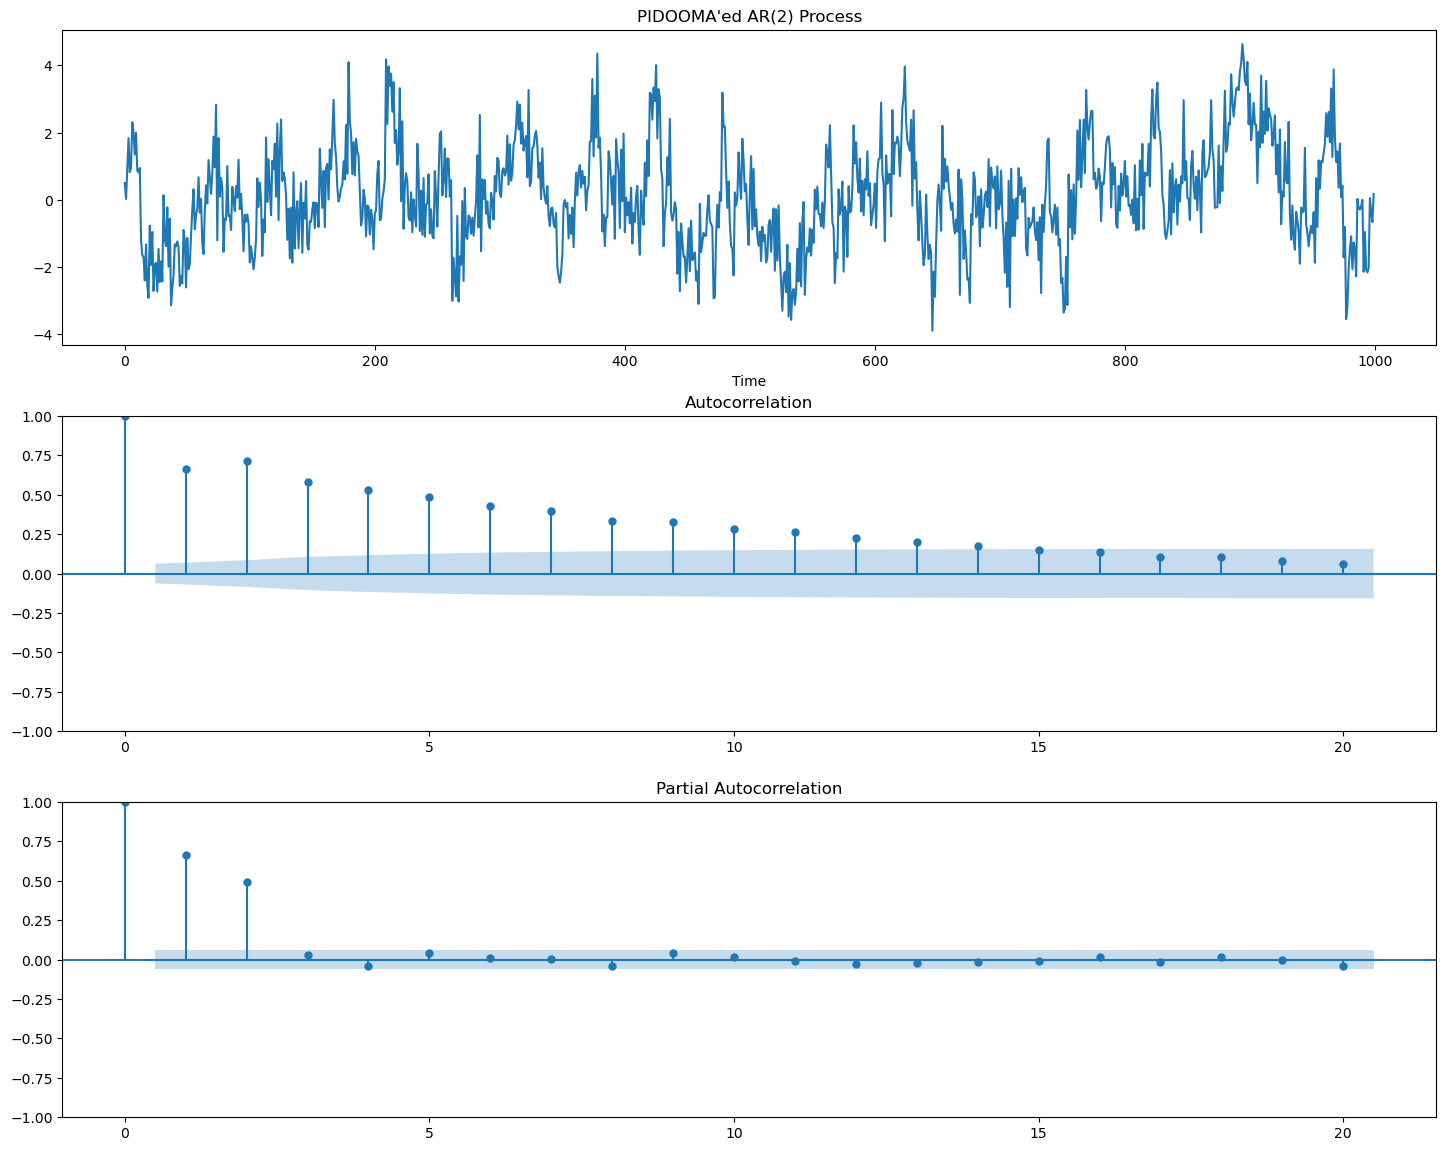

In [4]:
plot_ts_pacf_acf(AR2_process,"PIDOOMA'ed AR(2) Process")

In [5]:
#Create an MA(2) process
#create array of 1 number
ma2_ex_ar_coefficients = np.array([1]) #AR part...no AR
#create array of 3 numbers
ma2_ex_ma_coefficients = np.array([1, -0.4, -0.7]) #mA(2) part
#(ARMA) process is a statistical model used to analyze and forecast time series data
#Theoretical properties of an ARMA process for specified lag-polynomials
#ar: Coefficient for autoregressive lag polynomial, including zero lag
#ma: Coefficient for moving-average lag polynomial, including zero lag
MA2_process = ArmaProcess(ma2_ex_ar_coefficients, ma2_ex_ma_coefficients).generate_sample(nsample=1000)
               

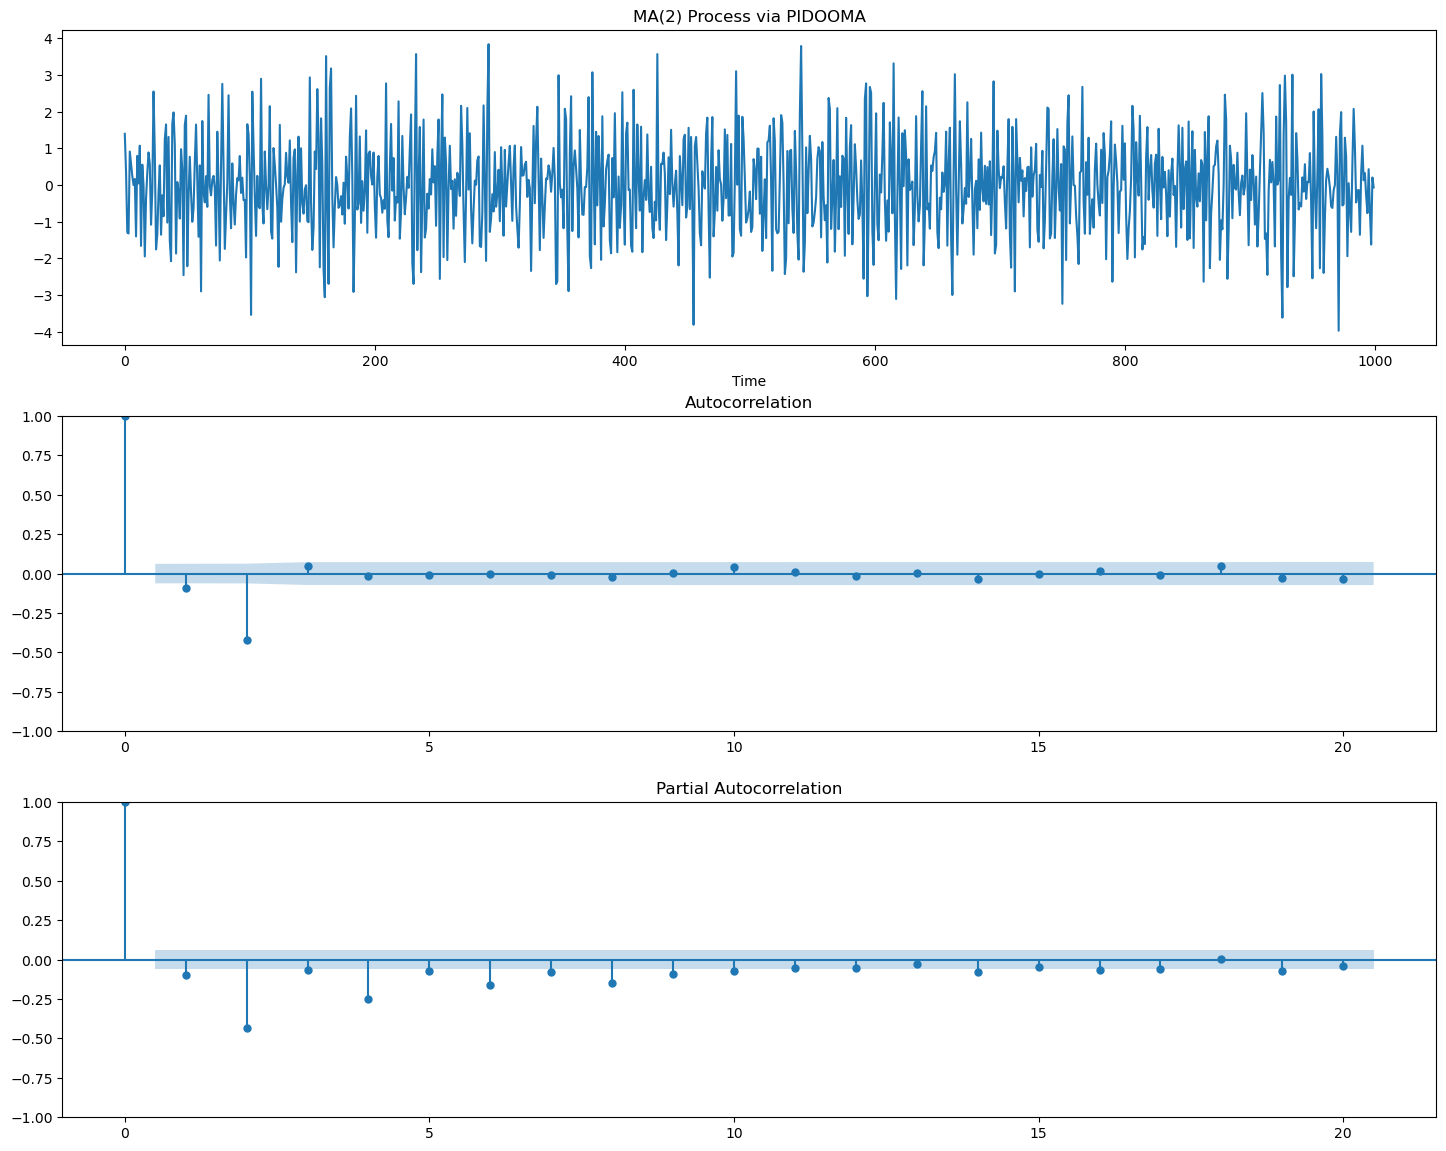

In [6]:
#plot time series, partial autocorrelation function, and autocorrelation function
plot_ts_pacf_acf(MA2_process,"MA(2) Process via PIDOOMA")

In [7]:
#ARMA(2,2)
##(ARMA) process is a statistical model used to analyze and forecast time series data
ARMA_2_2_process = (ArmaProcess(ar2_ex_ar_coefficients,ma2_ex_ma_coefficients).generate_sample(nsample=1000))

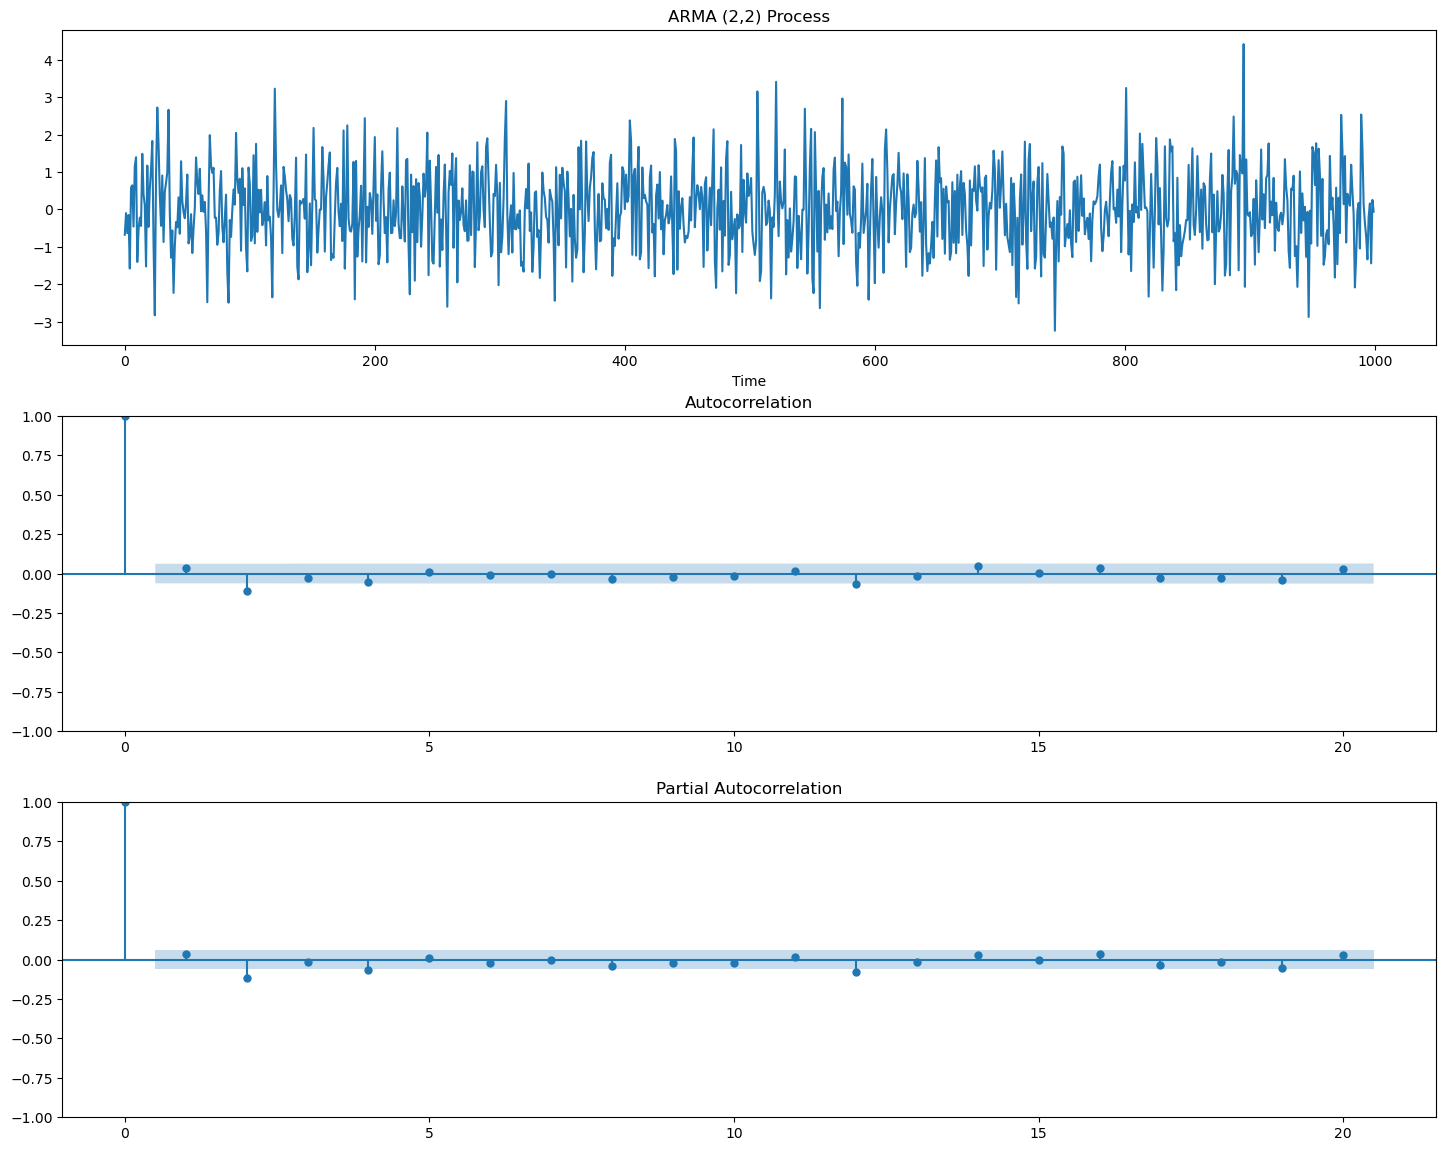

In [8]:
##plot time series, partial autocorrelation function, and autocorrelation function
plot_ts_pacf_acf(ARMA_2_2_process,"ARMA (2,2) Process")

In [9]:
#Stationarity

#particular test for time series
from statsmodels.tsa.stattools import adfuller
#The Augmented Dickey-Fuller test can be used to test for a unit root in a 
    #univariate process in the presence of serial correlation
result = adfuller(ARMA_2_2_process)

print(result)

#null_hypothesis = not stationary, definition?
print(f'ADF statistic:{result[0]}') #ANS: -17.776 --> negative --> can reject null 
print(f'p-value: {result[1]}') #ANS: 3.291e-30 --> that's good

(-17.776262294030857, 3.291468403355147e-30, 3, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, 2870.5793900671533)
ADF statistic:-17.776262294030857
p-value: 3.291468403355147e-30


In [10]:
 #An ARIMA(p, d, q) example

import pandas as pd

In [11]:
df = pd.read_csv('./data/jj.csv')
print(df.shape)
df.head()

(84, 2)


,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


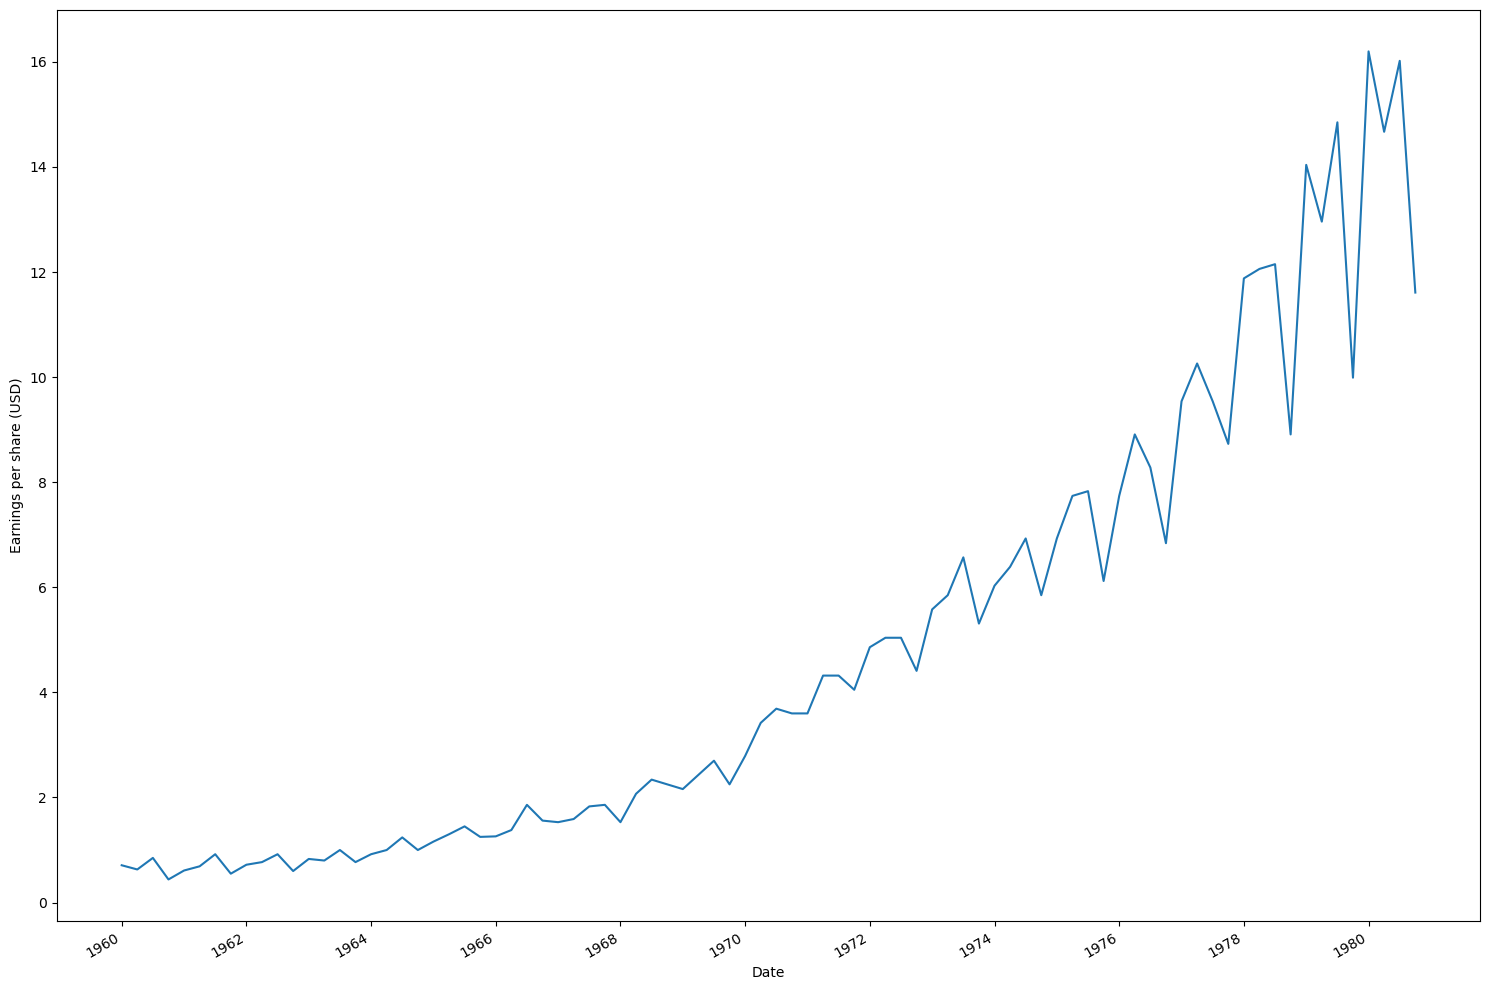

In [12]:
#resize subplot
fig, ax = plt.subplots(figsize=(15,10))
#plot data
ax.plot(df.date,df['data'])
#label x-axis
ax.set_xlabel('Date')
#label y-axis
ax.set_ylabel('Earnings per share (USD)')

#quarterly earnings
#every 2 years
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980] )
#automatically format the x-axis date tick labels
fig.autofmt_xdate()
plt.tight_layout()

In [13]:
def adf_analyze(data):
    #a statistical test used to determine if a time series is stationary
    adf_result = adfuller(data)
    print(f'ADF statistic:{adf_result[0]}') #ANS: -17.776 --> negative --> can reject null 
    print(f'p-value: {adf_result[1]}') #ANS: 3.291e-30 --> that's good

In [14]:
#a statistical test used to determine if a time series is stationary
adf_analyze(df['data']) #2.742

ADF statistic:2.742016573457468
p-value: 1.0


In [15]:
#Calculate the n-th discrete difference along the given axis
earnings_diff_1 = np.diff(df['data'],n = 1)
##a statistical test used to determine if a time series is stationary
adf_analyze(earnings_diff_1) #-0.407

ADF statistic:-0.407409763638043
p-value: 0.9088542416911309


In [16]:
#Calculate the n-th discrete difference along the given axis
earnings_diff_2 = np.diff(earnings_diff_1 ,n = 1)
##a statistical test used to determine if a time series is stationary
adf_analyze(earnings_diff_2) #-3.585

ADF statistic:-3.5851628747931517
p-value: 0.006051099869603741


In [17]:
d = 2 #d from ARIMA(p, d, q)

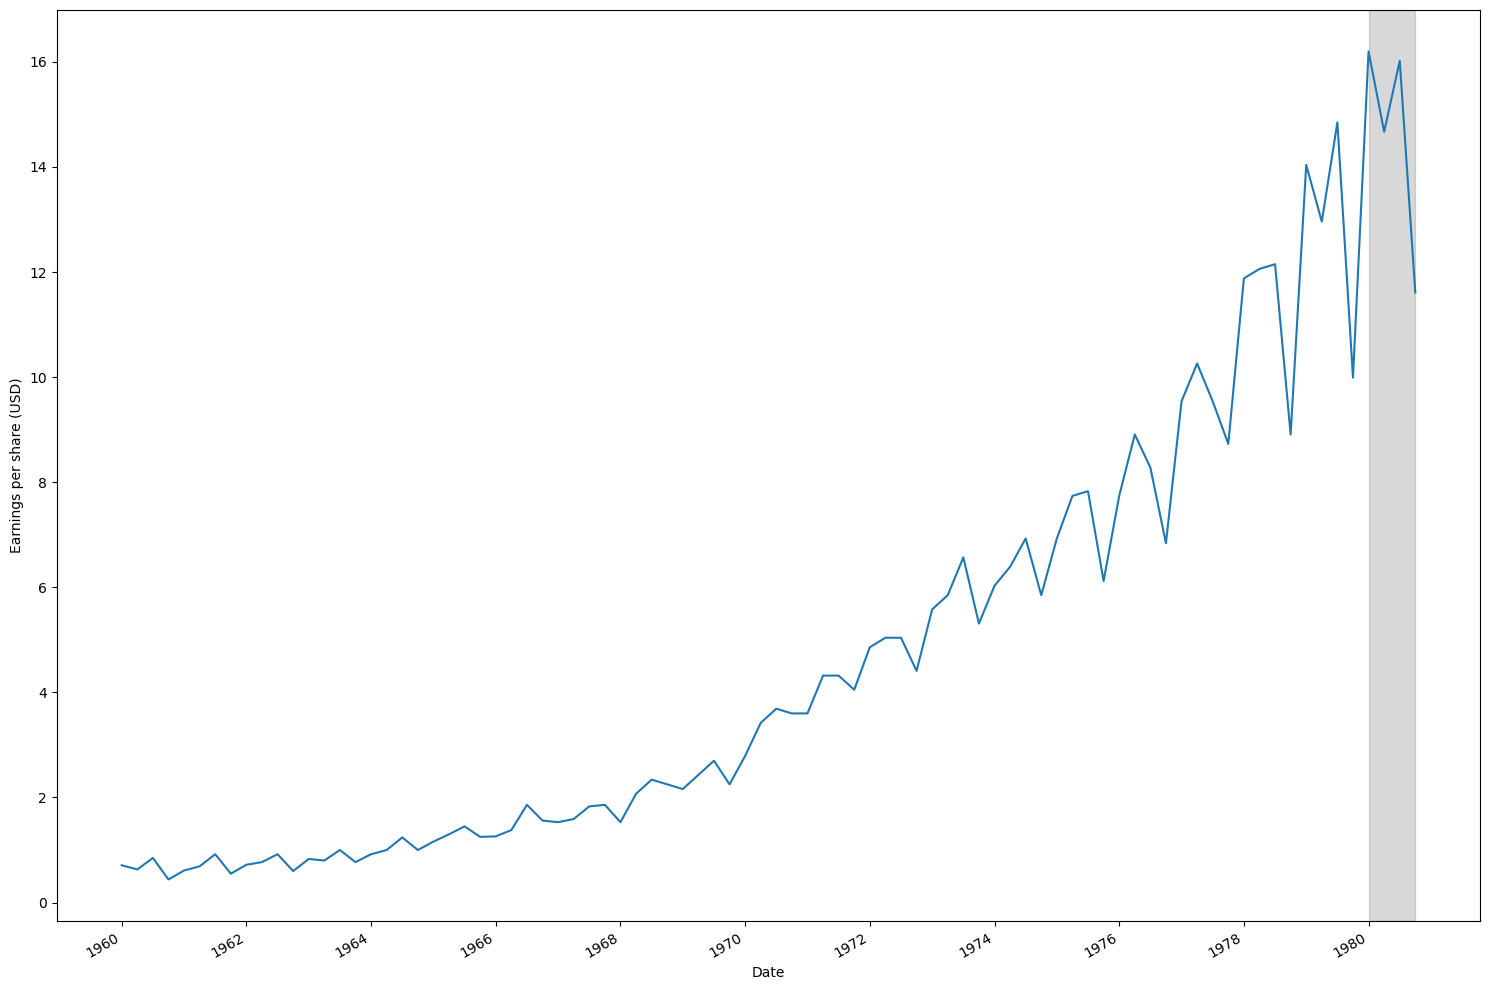

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(df.date,df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
#Add a vertical span (rectangle) across the Axes
ax.axvspan(80,83, color="gray", alpha=0.3)

#quarterly earnings
#every 2 years
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980] )

fig.autofmt_xdate()
plt.tight_layout()

In [71]:
from tqdm.notebook import tqdm_notebook

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

#Seasonal Autoregressive Integrated Moving Average with eXogenous regressors

from typing import Union

#define a function
def optimize_ARIMA(endog: Union[pd.Series,list], #encodes the type so either in the union
                   order_list: list,
                   d: int) -> pd.DataFrame:  #value of d for differencing
    #pre-define an object
    results = []
    #initialize for-loop
    for order in tqdm_notebook(order_list): #IPython/Jupyter Notebook progressbar decorator for iterators
        try: 
            p = order[0]
            q = order[1]
            #model = SARIMAX(endog, order = (p, d, q), simple_differencing = False).fit(disp = False)
            #This model is the basic interface for ARIMA-type models
            model = ARIMA(endog, order = (p, d, q)).fit()
        except: 
            print(f"Error fitting order {order}: {e}")
            continue
        #an estimator of prediction error and thereby relative quality of statistical models for a given set of data
        aic = model.aic
        #add to the end of the list
        results.append([order,aic])
    #create a dataframe
    result_df = pd.DataFrame(results, columns = ['(p,q)', 'AIC'])
    #result_df.columns['(p,q)', 'AIC']

    result_df = result_df.sort_values(by = 'AIC', ascending = True).reset_index(drop = True)

    return result_df

In [73]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)

#we found d above by repeating the ADF test and differencing and differentiating 

In [75]:
train = df['data'][:-4] #set aside last 4 quarters, train on rest


In [77]:
from itertools import product
#create different permutations with repetition
order_list = product(ps, qs)
#convert to a list
order_list = list(order_list)

In [63]:
#pip install ipywidgets
#pip install --upgrade ipywidgets

In [79]:
#run through created dataframe
result_df = optimize_ARIMA(train, order_list, d)

  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\Alissa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Alissa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Alissa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Alissa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Alissa\anaconda3\Lib\site-packages\statsmodels\tsa\

In [81]:
result_df

#(p, q) = (3, 3) AIC = 115.266 #lower AIC is better

,"(p,q)",AIC
0,"(3, 3)",115.273665
1,"(3, 1)",115.624980
2,"(3, 2)",115.672008
3,"(3, 0)",154.430678
4,"(0, 3)",194.654716
5,"(0, 2)",209.274515
6,"(2, 3)",220.666885
7,"(1, 3)",228.267839
8,"(1, 2)",228.935907
9,"(2, 2)",229.974675


In [26]:
#a statistical method used for time series analysis and forecasting. 
#It is an extension of the ARIMA model that accounts for seasonality
model = SARIMAX(train, order = (3, 2, 3), simple_differencing = False)

model_fit = model.fit(disp = False)

print(model_fit.summary())

#Ljung-Box: swedish

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   80
Model:               SARIMAX(3, 2, 3)   Log Likelihood                 -50.637
Date:                Thu, 17 Apr 2025   AIC                            115.274
Time:                        10:15:53   BIC                            131.771
Sample:                             0   HQIC                           121.878
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9992      0.037    -27.341      0.000      -1.071      -0.928
ar.L2         -0.9868      0.040    -24.835      0.000      -1.065      -0.909
ar.L3         -0.9753      0.026    -37.027      0.0

C:\Users\Alissa\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Alissa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


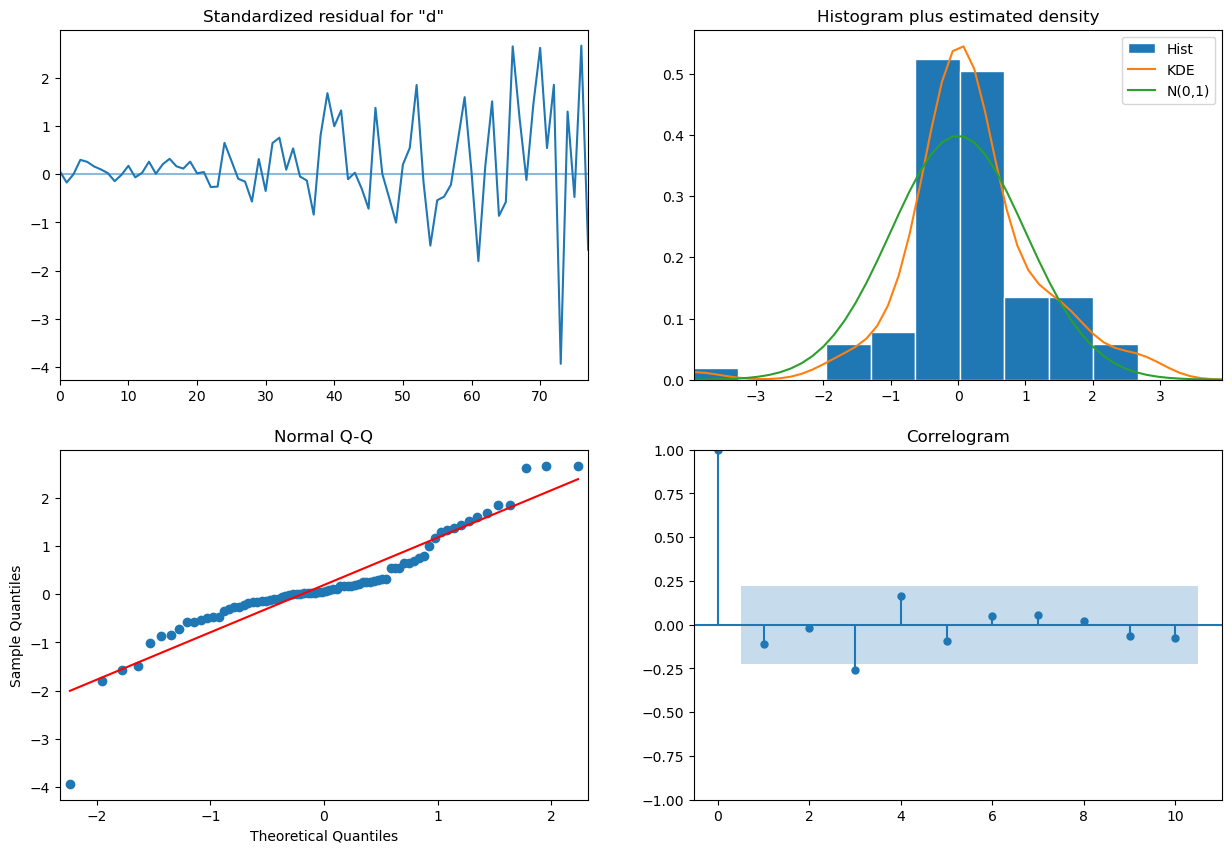

In [27]:
model_fit.plot_diagnostics(figsize=(15,10));

#residuals around 0 without trends or patterns, shouldn't grow from distance
#histogram, green is normal
#QQ
#correlogram: no correlation in residuals, most in blue box --> good


In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox
#extract the residuals from a fitted statistical model
residuals = model_fit.resid
#a function from the statsmodels library in Python used to test for autocorrelation in a time series
ljb_results = acorr_ljungbox(residuals,np.arange(1,11,1))

ljb_results

,lb_stat,lb_pvalue
1,1.583947,0.208193
2,1.585094,0.452690
3,7.242882,0.064546
4,9.166799,0.057063
5,9.780272,0.081706
6,10.009054,0.124271
7,10.258275,0.174404
8,10.294646,0.244952
9,10.636937,0.301418
10,11.097156,0.349999


In [29]:
test = df.iloc[-4:]

test['naive_seasonal'] = df['data'].iloc[76:80].values

test

C:\Users\Alissa\AppData\Local\Temp\ipykernel_6360\1349667878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_seasonal'] = df['data'].iloc[76:80].values


,date,data,naive_seasonal
80,1980-01-01,16.20,14.04
81,1980-04-01,14.67,12.96
82,1980-07-02,16.02,14.85
83,1980-10-01,11.61,9.99


In [30]:
ARIMA_pred = model_fit.get_prediction(80,83).predicted_mean

test['ARIMA_pred'] = ARIMA_pred

test

C:\Users\Alissa\AppData\Local\Temp\ipykernel_6360\1171040649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred


,date,data,naive_seasonal,ARIMA_pred
80,1980-01-01,16.20,14.04,15.858615
81,1980-04-01,14.67,12.96,14.380478
82,1980-07-02,16.02,14.85,16.371732
83,1980-10-01,11.61,9.99,11.683178


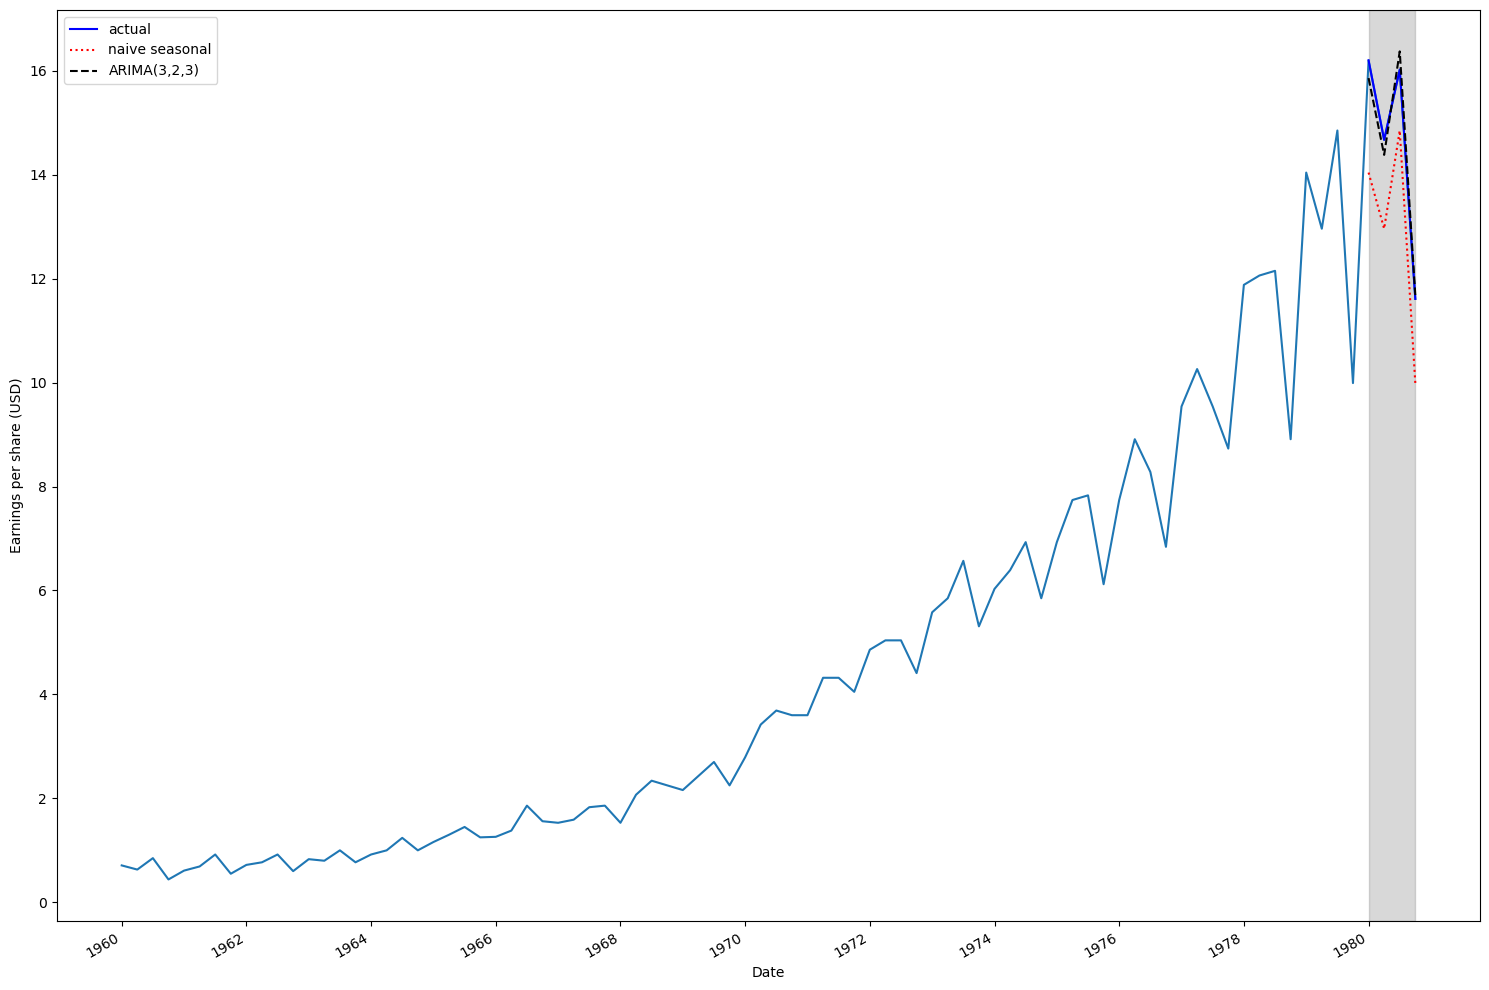

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(df.date,df['data'])
ax.plot(test['data'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(3,2,3)')

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

ax.axvspan(80,83, color="gray", alpha=0.3)

ax.legend(loc=2)

#quarterly earnings
#every 2 years
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980] )

fig.autofmt_xdate()
plt.tight_layout()